<a href="https://colab.research.google.com/github/ShaktidharK1997/MLCourseProjects/blob/main/Model_selection_with_K_Fold_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Shaktidhar Kanamarla, sk10945

## Task: Fit a linear model

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import pickle

from sklearn.model_selection import train_test_split, KFold

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
Xtr = np.load("Xtr.npy")
Xts = np.load("Xts.npy")
ytr = np.load("ytr.npy")
yts = np.load("yts.npy")

Now, fit a linear regression on the training data `Xtr,ytr`.  Make a prediction  `yhat` using the test data, `Xts`.  Compare `yhat` to `yts` to measure `rsq`, the  R2 value.  Use the `r2_score` method.

In [3]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
model = LinearRegression().fit(Xtr,ytr)
yhat = model.predict(Xts)
rsq = r2_score(yts,yhat)

You can test your work by looking at the output in the next cell (which you can also modify as you like - these cells will not be graded):

In [4]:
rsq

0.4499831346553011

<Axes: >

Text(0.5, 0, 'true x')

Text(0, 0.5, 'predicted x')

(-43.03009421208035, 48.302811086501464)

(-43.03009421208035, 48.302811086501464)

<Axes: >

Text(0.5, 0, 'true y')

Text(0, 0.5, 'predicted y')

(-43.03009421208035, 48.302811086501464)

(-43.03009421208035, 48.302811086501464)

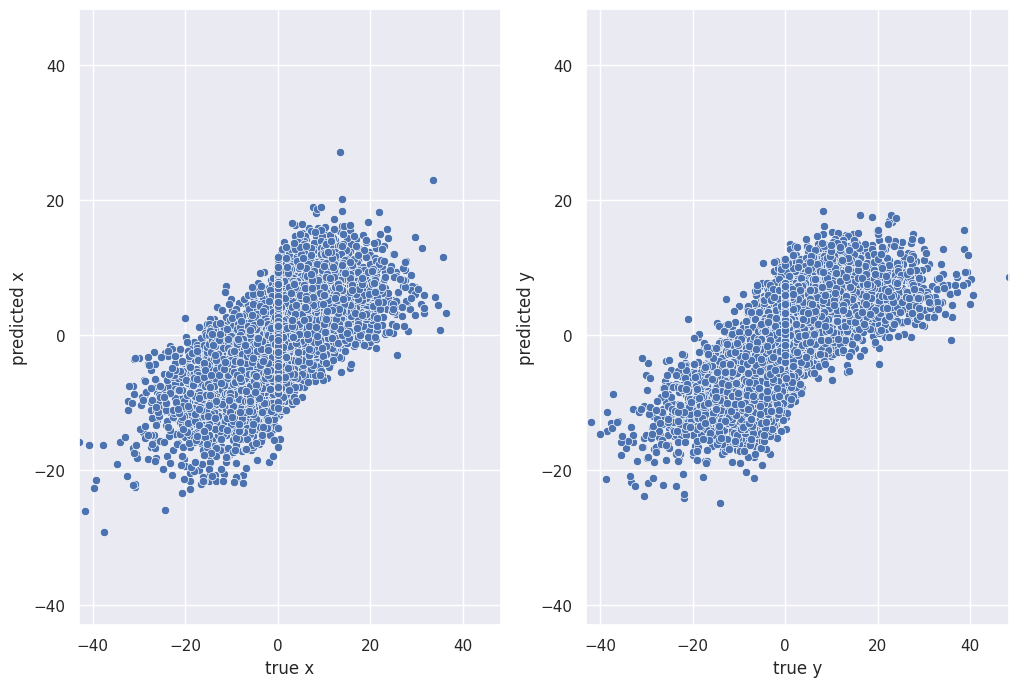

In [5]:
fig = plt.figure(figsize=(12,8))


lim_hi = np.max(np.concatenate([yts,yhat]));
lim_lo = np.min(np.concatenate([yts,yhat]));
sp1 = plt.subplot(1,2,1)
sns.scatterplot(x= yts[:,0],y=yhat[:,0]);
sp1.set_xlabel('true x');
sp1.set_ylabel('predicted x');
sp1.set_xlim(lim_lo,lim_hi);
sp1.set_ylim(lim_lo,lim_hi);


sp2 = plt.subplot(1,2,2)
sns.scatterplot(x= yts[:,1],y=yhat[:,1]);
sp2.set_xlabel('true y');
sp2.set_ylabel('predicted y');
sp2.set_xlim(lim_lo,lim_hi);
sp2.set_ylim(lim_lo,lim_hi);



plt.savefig('linear-predicted-vs-true.png')


<ipython-input-6-455e03528fd3>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sp1 = plt.subplot(1,2,1);


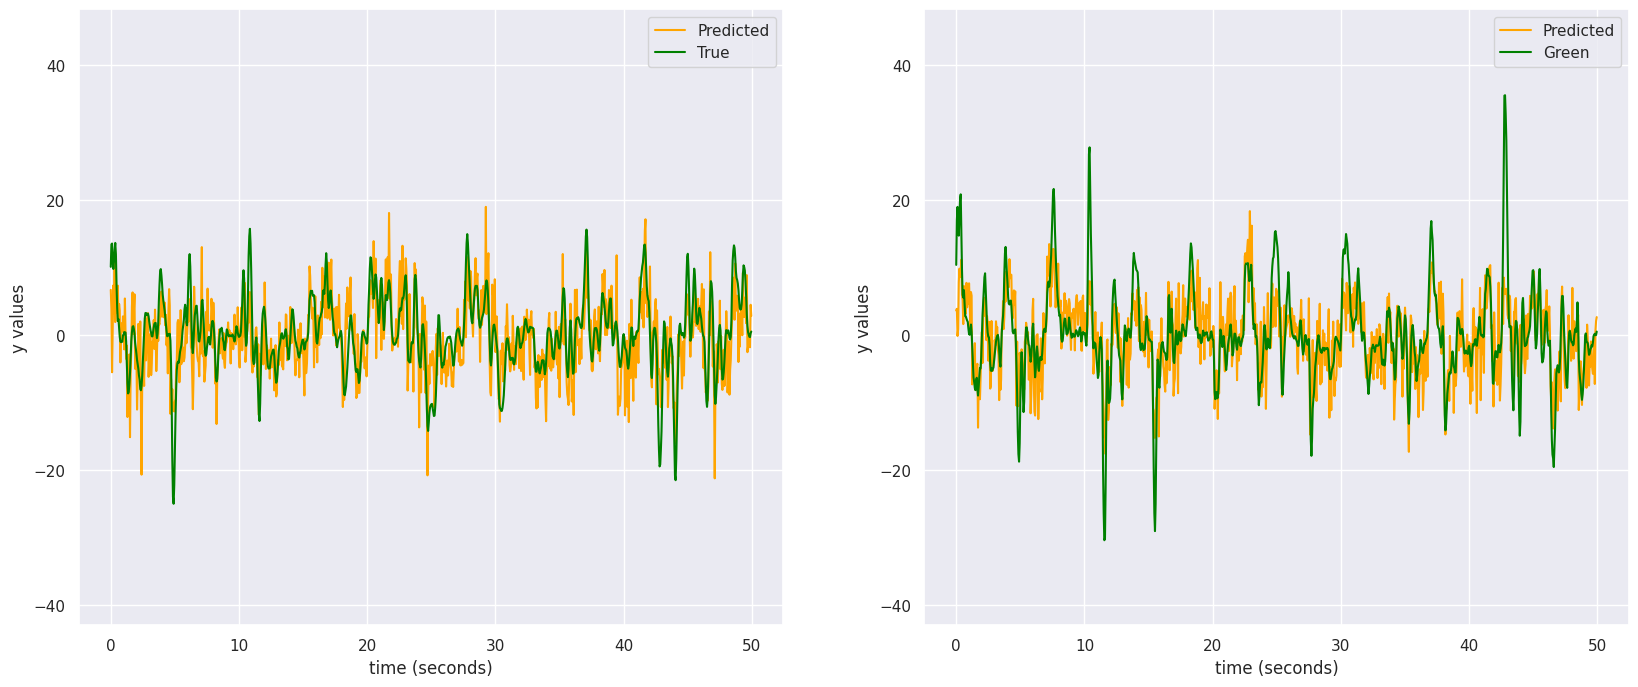

In [6]:
fig = plt.figure(figsize=(20,8));

plt.title('linear-predicted-true-over-time', loc='center')

lim_hi = np.max(np.concatenate([yts,yhat]));
lim_lo = np.min(np.concatenate([yts,yhat]));
sp1 = plt.subplot(1,2,1);
x= np.arange(0,50,0.05)
sns.lineplot(y=yhat[:1000,0],x=x,color = 'orange', label = 'Predicted');
sns.lineplot(y=yts[:1000,0],x=x, color = 'green', label = 'True');
sp1.set_ylabel('y values');
sp1.set_xlabel('time (seconds)');
sp1.set_ylim(lim_lo,lim_hi);

sp2 = plt.subplot(1,2,2);
sns.lineplot(y=yhat[:1000,1],x=x, color = 'orange', label = 'Predicted');
sns.lineplot(y= yts[:1000,1],x=x, color  = 'green', label = 'Green');
sp2.set_ylabel('y values');
sp2.set_xlabel('time (seconds)');
sp2.set_ylim(lim_lo,lim_hi);


plt.savefig('linear-predicted-true-over-time.png');


In [7]:
x.shape

(1000,)

## Task: Fit a linear model with delay = 2


In [8]:
with open('example_data_s1.pickle', 'rb') as fp:
    X,y = pickle.load(fp)

tsamp = 0.05
nt, nneuron = X.shape
nout = y.shape[1]
ttotal = nt*tsamp

nred = 6000

Xred = X[:nred]
yred = y[:nred]

In [9]:
def create_dly_data(X,y,dly):
    """
    Create delayed data
    """
    n,p = X.shape
    Xdly = np.zeros((n-dly,(dly+1)*p))
    for i in range(dly+1):
        Xdly[:,i*p:(i+1)*p] = X[dly-i:n-i,:]
    ydly = y[dly:]

    return Xdly, ydly

In [10]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)

Xdly, ydly = create_dly_data(X,y,2)

In [11]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
model = LinearRegression().fit(Xtr,ytr)
yhat = model.predict(Xts)
rsq  = r2_score(yts,yhat)

<Axes: >

Text(0.5, 0, 'true x')

Text(0, 0.5, 'predicted x')

(-43.03009421208035, 48.302811086501464)

(-43.03009421208035, 48.302811086501464)

<Axes: >

Text(0.5, 0, 'true y')

Text(0, 0.5, 'predicted y')

(-43.03009421208035, 48.302811086501464)

(-43.03009421208035, 48.302811086501464)

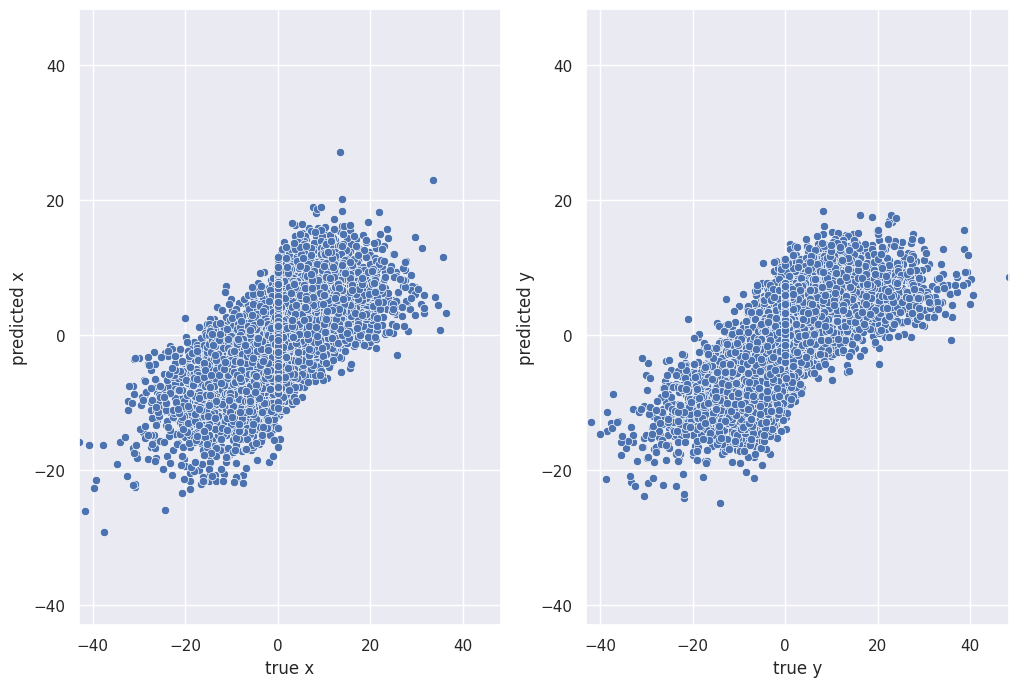

In [12]:
fig = plt.figure(figsize=(12,8))


lim_hi = np.max(np.concatenate([yts,yhat]));
lim_lo = np.min(np.concatenate([yts,yhat]));
sp1 = plt.subplot(1,2,1)
sns.scatterplot(x= yts[:,0],y=yhat[:,0]);
sp1.set_xlabel('true x');
sp1.set_ylabel('predicted x');
sp1.set_xlim(lim_lo,lim_hi);
sp1.set_ylim(lim_lo,lim_hi);


sp2 = plt.subplot(1,2,2)
sns.scatterplot(x= yts[:,1],y=yhat[:,1]);
sp2.set_xlabel('true y');
sp2.set_ylabel('predicted y');
sp2.set_xlim(lim_lo,lim_hi);
sp2.set_ylim(lim_lo,lim_hi);



plt.savefig('dly-predicted-vs-true.png')


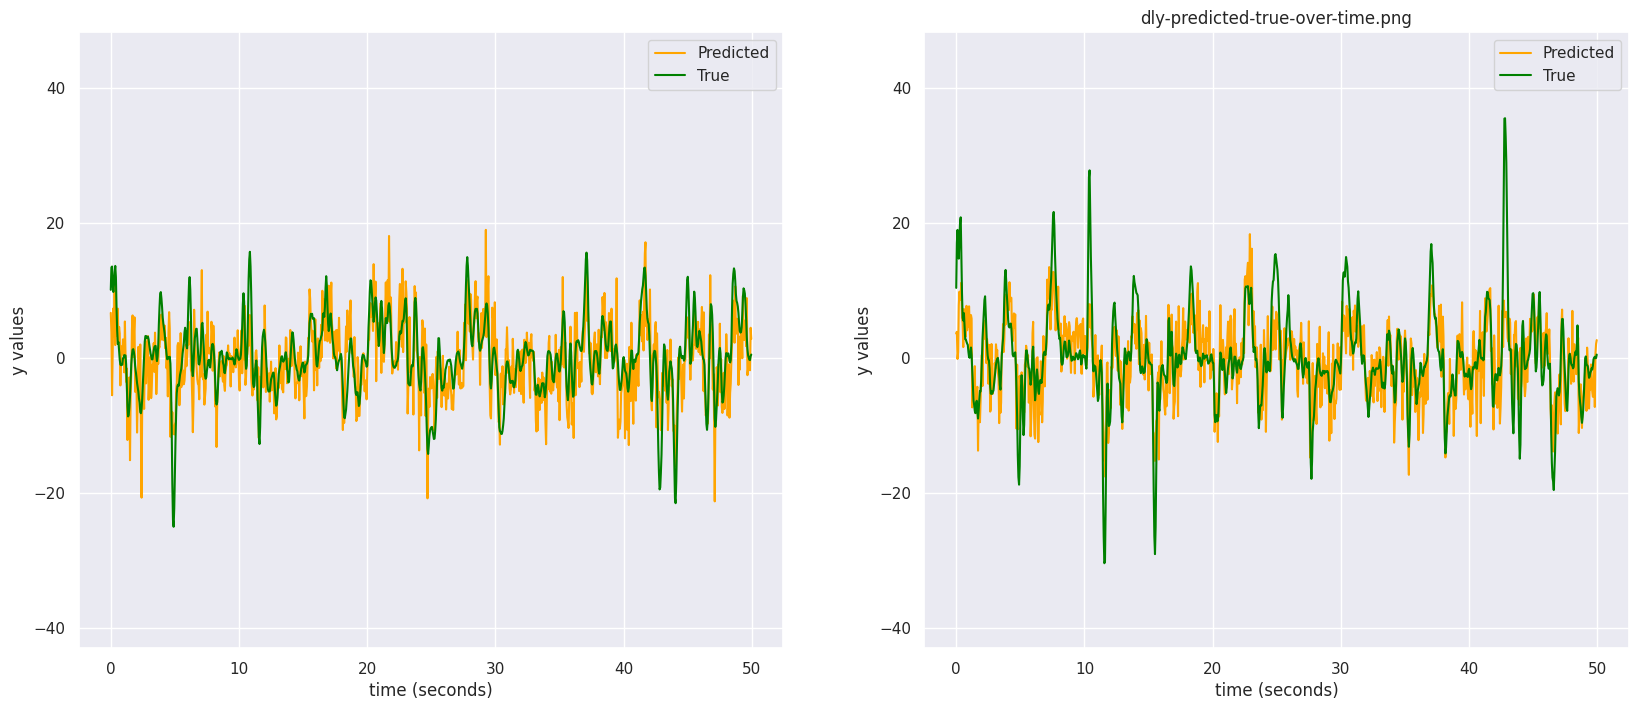

In [13]:
fig = plt.figure(figsize=(20,8));


lim_hi = np.max(np.concatenate([yts,yhat]));
lim_lo = np.min(np.concatenate([yts,yhat]));
sp1 = plt.subplot(1,2,1);
x= np.arange(0,50,0.05)
sns.lineplot(y=yhat[:1000,0],x=x,color = 'orange', label = 'Predicted');
sns.lineplot(y=yts[:1000,0],x=x, color = 'green', label = 'True');
sp1.set_ylabel('y values');
sp1.set_xlabel('time (seconds)');
sp1.set_ylim(lim_lo,lim_hi);


sp2 = plt.subplot(1,2,2);
sns.lineplot(y=yhat[:1000,1],x=x, color = 'orange', label = 'Predicted');
sns.lineplot(y= yts[:1000,1],x=x, color  = 'green', label = 'True');
sp2.set_ylabel('y values');
sp2.set_xlabel('time (seconds)');
sp2.set_ylim(lim_lo,lim_hi);


plt.title('dly-predicted-true-over-time.png');
plt.savefig('dly-predicted-true-over-time.png');


## Task: Fit linear models with multiple delay values testing best one using K-Fold Cross validation

In [14]:
dmax = 15

Xdly, ydly = create_dly_data(Xred,yred,dmax)

In [15]:
dtest_list = np.arange(0, dmax+1)
nd = len(dtest_list)
nfold = 10

In [16]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)

#  Create a k-fold object
kf = KFold(n_splits = nfold)

# Initialize a matrix Rsq to hold values of the R^2 across the model orders and folds.
Rsq = np.zeros((nd,nfold))

# Loop over the folds
for i, idx_split in enumerate(kf.split(Xdly)):

    # Get the training and validation data in the split
    idx_tr, idx_val = idx_split

    for it, dtest in enumerate(dtest_list):
        # DO NOT call create_dly_data again
        # just select the appropriate subset of columns of Xdly
        # X_dtest = Xdly with the columns corresponding to only the `dtest+1` most recent times.
        X_dtest = Xdly[:,:((dtest+1)*Xred.shape[1])]

        # Split the data (X_dtest,ydly) into training and validation
        # using idx_tr and idx_val
        Xtr = X_dtest[idx_tr]
        ytr = ydly[idx_tr]
        Xval = X_dtest[idx_val]
        yval = ydly[idx_val]

        # Fit linear regression on training data
        model = LinearRegression().fit(Xtr,ytr)
        yhat = model.predict(Xval)
        Rsq[it,i] = r2_score(yval,yhat)
        #  Measure the R2 on validation data and store in the matrix Rsq

In [17]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
Rsq_mean = np.mean(Rsq, axis = 1)

Rsq_se = np.std(Rsq, axis = 1)/np.sqrt(nfold-1)

d_opt = np.argmax(Rsq_mean)

In [18]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
target = Rsq_mean[d_opt] - Rsq_se[d_opt]

d_one_se = dtest_list[np.min(np.where(Rsq_mean >= target))]
d_one_se

6

<ErrorbarContainer object of 3 artists>

<Axes: >

Text(0.5, 0, 'Delay value')

Text(0, 0.5, 'K-fold R2')

Text(0.5, 1.0, 'K-Fold R2 value vs Delay ')

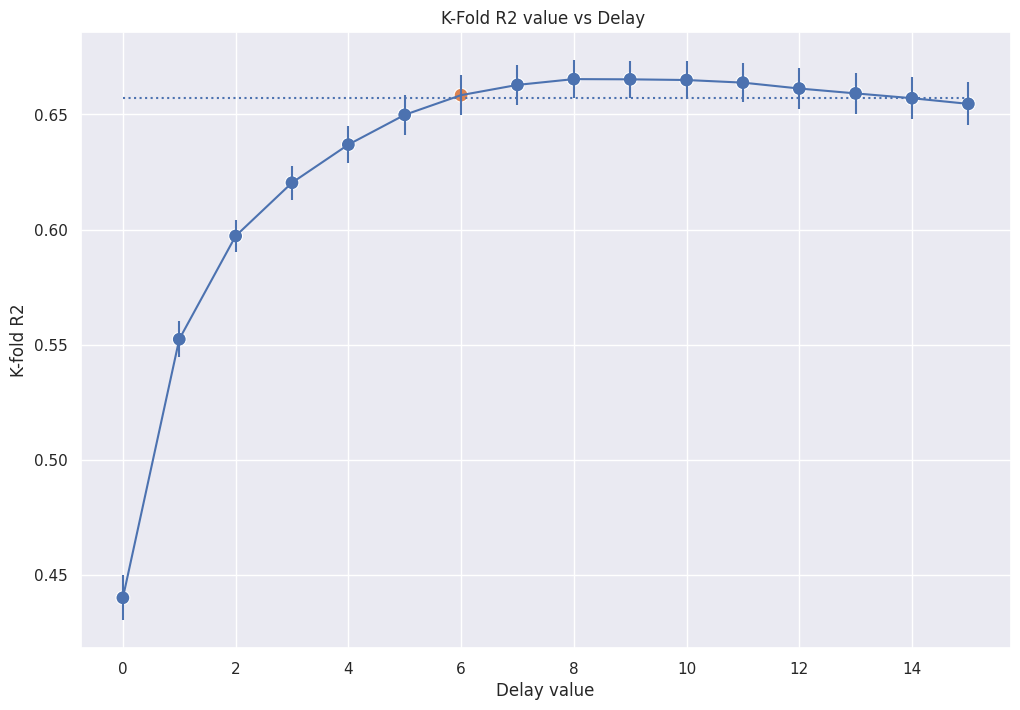

In [19]:
fig = plt.figure(figsize  = (12,8));
plt.errorbar(x=dtest_list, y=Rsq_mean, yerr=Rsq_se);
plt.hlines(y=target, xmin=np.min(dtest_list), xmax=np.max(dtest_list), ls='dotted')
sns.scatterplot(x=dtest_list, y=Rsq_mean, hue=dtest_list==d_one_se, s=100, legend=False);
plt.xlabel("Delay value");
plt.ylabel("K-fold R2");
plt.title('K-Fold R2 value vs Delay ');
plt.savefig('rsq-vs-dly.png')

In [20]:
dmax = 15
Xdly, ydly = create_dly_data(Xred,yred,dmax)

In [21]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
d_one_se = 6

In [22]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
model = LinearRegression().fit(Xdly[:,:(d_one_se+1)*Xred.shape[1]],ydly)
# fit a model...

In [23]:
#grade (do not modify this cell)
# if d_one_se is the optimal model order, you can use
# for this workspace, we'll use a slightly different test set than the Colab notebook
Xts = X[nred+1:nred+1001+d_one_se]
yts = y[nred+1:nred+1001+d_one_se]
# and then use
Xts_dly, yts_dly = create_dly_data(Xts,yts,d_one_se)

In [24]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
yhat = model.predict(Xts_dly[:,:(d_one_se+1)*Xred.shape[1]])
rsq = r2_score(yts_dly,yhat)

<Axes: >

<Axes: >

Text(0, 0.5, 'y values')

Text(0.5, 0, 'time (seconds)')

(-41.79897303309296, 35.163678667556724)

<Axes: >

<Axes: >

Text(0, 0.5, 'y values')

Text(0.5, 0, 'time (seconds)')

(-41.79897303309296, 35.163678667556724)

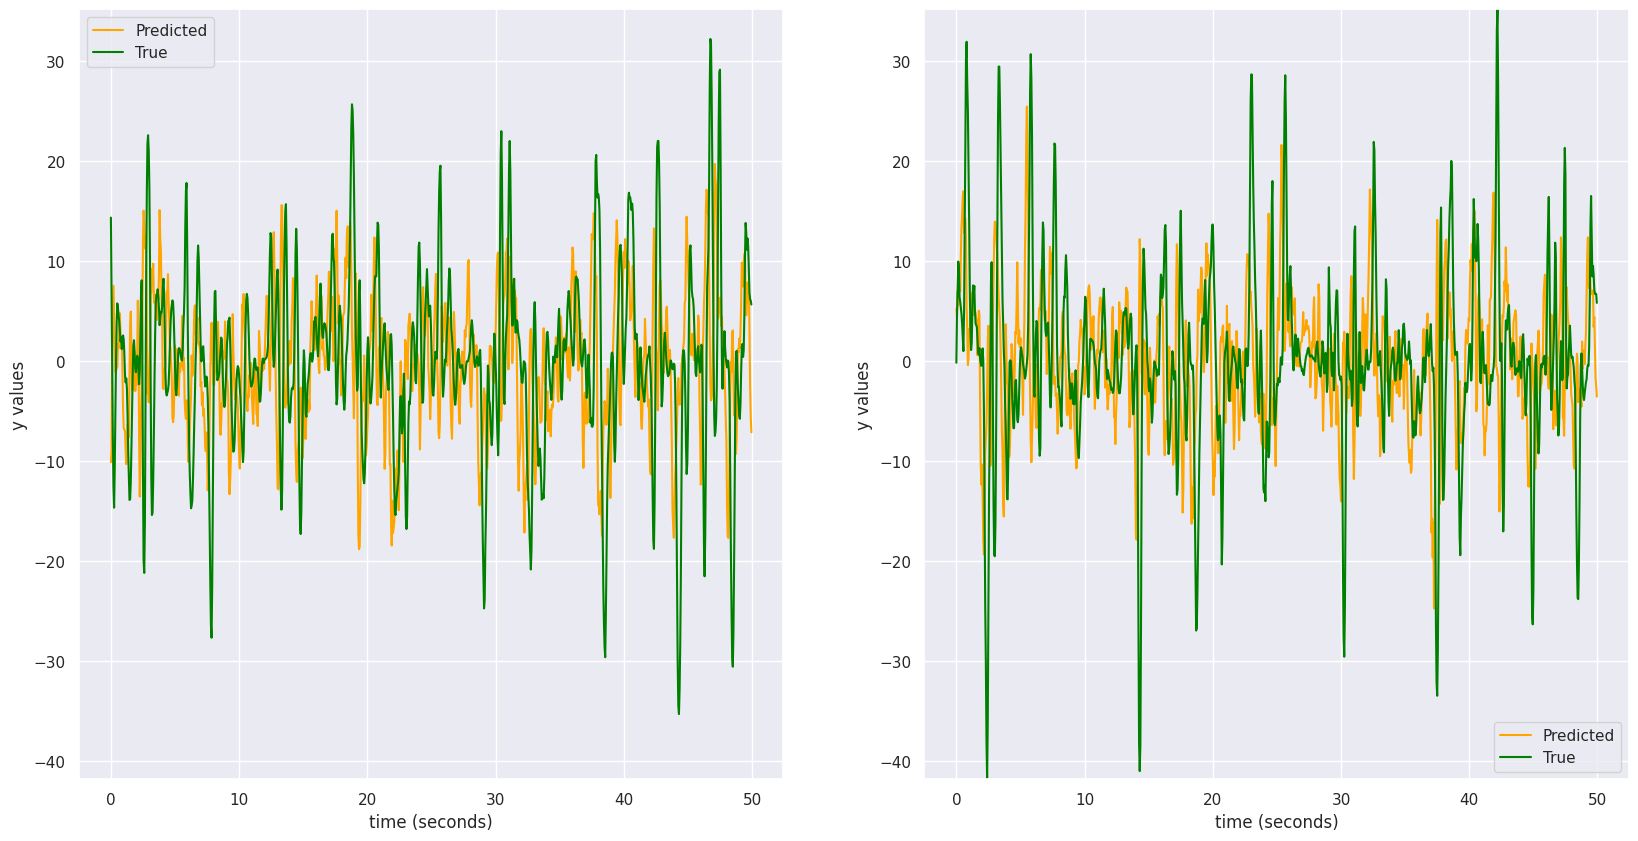

In [25]:
fig = plt.figure(figsize=(20,10))


lim_hi = np.max(np.concatenate([yts,yhat]));
lim_lo = np.min(np.concatenate([yts,yhat]));
sp1 = plt.subplot(1,2,1);
x= np.arange(0,50,0.05)
sns.lineplot(y=yhat[:1000,0],x=x,color = 'orange', label = 'Predicted');
sns.lineplot(y=yts[:1000,0],x=x, color = 'green', label = 'True');
sp1.set_ylabel('y values');
sp1.set_xlabel('time (seconds)');
sp1.set_ylim(lim_lo,lim_hi);

sp2 = plt.subplot(1,2,2);
sns.lineplot(y=yhat[:1000,1],x=x, color = 'orange',label = 'Predicted');
sns.lineplot(y= yts[:1000,1],x=x, color  = 'green',label = 'True');
sp2.set_ylabel('y values');
sp2.set_xlabel('time (seconds)');
sp2.set_ylim(lim_lo,lim_hi);


plt.legend()
plt.savefig('dkfold-predicted-true-over-time.png')
